- 2022/05/15
- TensorFlow, PyTorch + GPU の環境構築手順と実装例．
  - 基本Windows用．いずれUbuntuにも対応予定．

# ガイド

- OSは**Ubuntu**を推奨
  - 個人的な実験から，同じハードウェア構成でも速度は Windows < WSL < 純Ubuntu
- フレームワークは**PyTorch**を推奨
  - TensorFlowは簡潔だが自由度が低い．用途はデータ分析・ビジネス寄り．
  - PyTorchは学習アルゴリズムも細かく書くが，自由度が高い．用途は研究寄り．環境構築手数も少ない．

## 環境別　必要な作業
- 共通
  - NVIDIA Driver のインストール
- Ubuntu + PyTorch
  - `pip3 install torch torchvision torchaudio` だけ（CUDA, cuDNNが同梱されている）
- Ubuntu + Tensorflow
  - CUDA, cuDNN のインストール
  - `pip3 install tensorflow`
- Windows + PyTorch
- Windows + Tensorflow
  - WSL2が必須

# CUDA

TensorFlowやPyTorchでGPUを使う場合、NVIDIA製GPU、CUDA Toolkit、cuDNNが必要となる。以下手順。

1. GPU（NVIDIA製）のドライバーを最新にする．
   - WindowsはNVIDIA GeForce Experienceアプリを使うと更新通知が来るので便利．
   - Ubuntuはお使いのパッケージ管理ツールで．
     - DL元が複数あり，やや面倒．いずれ詳細を書く．
2. https://developer.nvidia.com/cuda-toolkit-archive から CUDA Toolkit をダウンロード＆インストールする。
   - [PyTorch公式サイト](https://pytorch.org/) でPyTorchが対応するCUDAのバージョンに合わせたほうがいいが、ぶっちゃけ最新版でもたいてい動く。
3. https://developer.nvidia.com/rdp/cudnn-download から CUDA Toolkit に対応するバージョンの cuDNN をダウンロードする（要ユーザ登録）。
4. 展開したフォルダの中身（`bin/`, `include/`など）を `C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.x\` にぶちまける。
5. 再起動する（重要）。

2022/05/15時点の最新バージョンは以下の通り。
- GPUドライバー：516.01
- CUDA 11.7.0
  - `> nvcc -V` で確認できる。
  - `> nvidia-smi` で確認できるのはGPUドライバーが対応するCUDAのバージョンであり、実際にそれをインストールしているかどうかはわからない。
- cuDNN v8.4.0
  - `.../11.x/include/cudnn_version.h` で確認できる。

In [1]:
# CUDAバージョン確認
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:41:10_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


# TensorFlow vs. PyTorch

- 一般的な傾向
  - TF (Google)
    - とにかく短いコードで書ける．
  - PyTorch (Meta)
    - 日本製 Chainer (PFN) をベースとする．
    - 学習アルゴリズムレベルで細かく書くことが多く，柔軟性が高い．
  - 逆にTFでもアルゴリズムレベルで書けるし，PyTorchでもTFライクに書けるが，一般的にはそんな傾向がある．
  - 年々PyTorchのシェアが上昇し，2020年頃にTFを追い抜いているらしい．
  - データ分析やビジネス用途ではTF，研究用途ではPyTorchと棲み分けされている雰囲気．
- 個人的にはPyTorchを推奨．

# TensorFlow

- https://www.tensorflow.org/
- <span style="color: red;">TF2.11以降はWindowsユーザーはWSLでないとGPUが使えなくなった模様。</span>
  - WindowsユーザーはWSLかTF2.10を使いましょう．

インストール
1. `pip install tensorflow==2.10`
2. 終わり。

トラブルシューティング
- Pythonの**メジャーアップデート直後**は対応していないことが多いので注意。
  - [ここで確認できる。](https://pypi.org/project/tensorflow-gpu/#files)
- 何か問題がある時は**コマンドライン上で動かしてみる**とよい．
  - Jupyter上では出ない情報が出ることがある．
- <span style="color: red;">JupyterでCNN使用時，**Kernel Crash**が発生！！</span>
  - コマンドラインでやると「Could not locate zlibwapi.dll」と言われる．
  - [ここ](https://docs.nvidia.com/deeplearning/cudnn/install-guide/index.html#install-zlib-windows)からダウンロードし、その中の`dll_x64/zlibwapi.dll`を`.../v11.x/bin/`（パスの通っているところ）に入れて解決。
  - エンカ率高いかも．

In [1]:
# バージョン確認
import tensorflow as tf
tf.__version__

'2.10.0'

In [2]:
# GPUを認識しているか確認
from tensorflow.python.client import device_lib
# 戻り値のリストの1つ目がCPU、2つ目がGPU
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10013835394302677596
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4163895296
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13516921266504390878
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

使用例

In [3]:
# MNISTデータセットの読み込み
(x_tr, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)
[5 0 4 1 9 2 1 3 1 4]


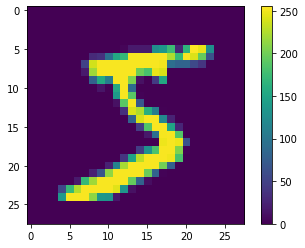

In [4]:
# データセット内容の確認
import matplotlib.pyplot as plt

print(x_tr.shape, x_te.shape)   # データ数×グレースケール画像（2次元配列）
print(y_tr.shape, y_te.shape)   # データ数×ラベル（0-9の整数）
print(y_tr[:10])                # ラベルは0-9の整数

plt.imshow(x_tr[0])             # 0枚目の画像
plt.colorbar()

In [5]:
# チャンネル次元を追加し（CNNで必要）、ついでに正規化
x_tr = x_tr.reshape(-1, 28, 28, 1) / 255
x_te = x_te.reshape(-1, 28, 28, 1) / 255

In [6]:
# 多層NNの作成
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=x_tr[0].shape))
model.add(Dense(128, "relu"))
model.add(Dense(10, "softmax"))

In [7]:
# モデルをコンパイルして学習実行
model.compile("adam", "sparse_categorical_crossentropy", metrics=["acc"])
history = model.fit(x_tr, y_tr, epochs=5, validation_data=(x_te, y_te))

Epoch 1/5
1875/1875 [==============================] - 18s 7ms/step - loss: 0.2597 - acc: 0.9260 - val_loss: 0.1399 - val_acc: 0.9587
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1114 - acc: 0.9673 - val_loss: 0.1012 - val_acc: 0.9681
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0770 - acc: 0.9766 - val_loss: 0.0886 - val_acc: 0.9729
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0568 - acc: 0.9824 - val_loss: 0.0811 - val_acc: 0.9742
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0444 - acc: 0.9858 - val_loss: 0.0686 - val_acc: 0.9774


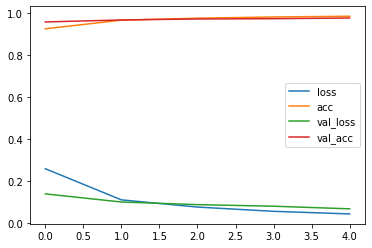

In [8]:
# 学習曲線
for label, metric in history.history.items():
    plt.plot(metric, label=label)
plt.legend()

In [9]:
# 0枚目の画像の文字を予測：最大値のインデックスは4なので，数字の"5"と判定できている．
model(x_tr[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.7824021e-10, 1.5800021e-08, 1.8044743e-08, 9.4208438e-03,
        8.2259168e-17, 9.9057895e-01, 4.6476305e-13, 8.6219600e-08,
        4.4627853e-09, 2.2625970e-08]], dtype=float32)>

In [10]:
# CNNを使ってみる（構造は適当）
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, BatchNormalization, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=x_tr[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(64, "relu"))
model.add(Dense(10, "softmax"))

model.compile("adam", "sparse_categorical_crossentropy", metrics=["acc"])
history = model.fit(x_tr, y_tr, epochs=5, validation_data=(x_te, y_te))

Epoch 1/5
1875/1875 [==============================] - 30s 12ms/step - loss: 0.1052 - acc: 0.9676 - val_loss: 0.0706 - val_acc: 0.9795
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0457 - acc: 0.9868 - val_loss: 0.0524 - val_acc: 0.9848
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0326 - acc: 0.9903 - val_loss: 0.0498 - val_acc: 0.9854
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0244 - acc: 0.9923 - val_loss: 0.0466 - val_acc: 0.9857
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0193 - acc: 0.9942 - val_loss: 0.0490 - val_acc: 0.9877


# PyTorch

1. [公式サイト](https://pytorch.org/) の INSTALL PYTORCH のところで自分の環境に合わせて選択し、`Run this Command:` のコマンドを実行する。
2. 終わり。

たとえば Stable (1.11.0), Windows, Pip, Python, CUDA 11.3 なら
```sh
> pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
```
<span style="color: red;">パッケージ更新時、`pip install -U torch` だとCPU版に更新されてしまうっぽいので、毎回上記の手順を踏む。</span>



In [1]:
# バージョン確認。CPU版の場合 "+cu113" のような表記がないことに注意。
import torch
torch.__version__

'1.13.0+cu117'

In [2]:
# CUDAが使えることを確認
torch.cuda.is_available()

True

## 使用例
- ここではバッチ処理用の関数batch_process()と学習・テストを行うfit()関数を事前に作る。
  - 作ったモデルをfit()にぶちこめばほぼKerasと同様に使えるというわけである。
- GPUを使う場合はデータとモデルをGPUのメモリに転送する命令2行が必要。
  - 言い換えればCPUを使う場合に対し、この2行を追加するだけでGPUが使われる。簡単だね！
  - 書く場所はそれぞれ順伝播の前とモデルを作った後とか。

In [3]:
# MNISTデータの読み込み
from torchvision import transforms, datasets
trans = transforms.ToTensor()   # これを使い読み込み時に指定した前処理を行う。
# ~/data/にデータをダウンロードし、読み込む。既にある場合はそれが読み込まれる。
data_tr = datasets.MNIST("~/data/", train= True, transform=trans, download=True)
data_te = datasets.MNIST("~/data/", train=False, transform=trans, download=True)

In [25]:
# 誤差関数、バッチ処理関数、学習・テスト関数の定義
import time
from torch import nn
ce_loss = nn.CrossEntropyLoss()

def batch_process(model, optimizer, data, batch_size=128, train=False):
    """バッチ処理関数（学習・テストで使い回す）
    Args:
        model (torch.nn.Module): モデル（インスタンス）
        optimizer: torch.optim.Adamとか
        data: data_tr or data_te
        batch_size (int): ミニバッチのデータ数
        train (bool): 学習時ならTrue、テスト時ならFalseとする。
    Returns:
        誤差と精度のtuple
    """

    # 誤差と正答数
    total_loss = 0
    total_true = 0

    # モード変更
    model.train() if train else model.eval()
    
    # 各ミニバッチに対し
    for batch, (x, y) in enumerate(torch.utils.data.DataLoader(data, batch_size, shuffle=True)):
        # データをGPUのメモリに送る
        x, y = x.cuda(), y.cuda()
        # 順伝播
        p = model(x)
        loss = ce_loss(p, y)

        # 学習時は勾配初期化・逆伝播・パラメータ更新
        if train:
            model.zero_grad()
            loss.backward()
            optimizer.step()

        total_loss += loss * len(x)
        total_true += sum((p.argmax(1) == y))
        print(f"\r{batch:>4d} / {len(data_tr)//batch_size:>4d}", end="")
    return float(total_loss / len(data)), float(total_true / len(data))

def fit(model_cls, batch_size=128, epochs=1):
    """学習と、ついでにテスト（検証）しちゃう関数
    Args:
        model_cls (torch.nn.Module): モデルのclass
        batch_size (int): ミニバッチのデータ数
        epochs (int): エポック数
    Returns:
        学習中の誤差・精度の推移データ。Kerasのfit()の戻り値っぽくする。
    """
    # モデルのインスタンスを生成し、GPUのメモリに送る。
    model = model_cls().cuda()
    optimizer = torch.optim.Adam(model.parameters())
    # 学習結果
    metrics = ["loss", "acc", "val_loss", "val_acc"]
    history = {key: [] for key in metrics}
    start = time.time()
    # 各エポックに対し
    for epoch in range(1, 1+epochs):
        # 学習
        loss, acc = batch_process(model, optimizer, data_tr, batch_size, train=True)
        # テスト（勾配は計算させない）
        with torch.no_grad():
            val_loss, val_acc = batch_process(model, optimizer, data_te, batch_size)
        # ログ出力・学習結果保存
        print(f"\r[Epoch {epoch}/{epochs}]\ttime: {time.time()-start:>5.1f}s - loss: {loss:.4f} - acc: {acc:.4f} - val_loss: {val_loss:.4f} - val_acc: {val_acc:.4f}")
        for k, v in zip(metrics, [loss, acc, val_loss, val_acc]):
            history[k].append(float(v))
    return history

### シンプルなNNの場合
- 過学習気味。
- RTX 3080 Ti (Laptop) + Windows で59.4秒

In [7]:
class MLP(nn.Module):
    def __init__(self, n_in=28*28*1, n_out=10):
        super().__init__()
        self.l1 = nn.Linear(in_features=n_in, out_features=1024)
        self.l2 = nn.Linear(in_features=1024, out_features=1024)
        self.l3 = nn.Linear(in_features=1024,out_features=n_out)
        self.relu = nn.ReLU()

    def forward(self, x):
        h1 = self.relu(self.l1(x.view(-1, 784)))
        h2 = self.relu(self.l2(h1))
        return self.l3(h2)
        
history = fit(MLP, epochs=10)

[Epoch 1/10]	time:  19.6s - loss: 0.2292 - acc: 0.9305 - val_loss: 0.1060 - val_acc: 0.9663
[Epoch 2/10]	time:  39.3s - loss: 0.0824 - acc: 0.9745 - val_loss: 0.0762 - val_acc: 0.9768
[Epoch 3/10]	time:  58.4s - loss: 0.0522 - acc: 0.9834 - val_loss: 0.0739 - val_acc: 0.9782
[Epoch 4/10]	time:  78.2s - loss: 0.0373 - acc: 0.9883 - val_loss: 0.0763 - val_acc: 0.9787
[Epoch 5/10]	time:  96.3s - loss: 0.0295 - acc: 0.9905 - val_loss: 0.0861 - val_acc: 0.9767
[Epoch 6/10]	time: 113.6s - loss: 0.0264 - acc: 0.9910 - val_loss: 0.0975 - val_acc: 0.9744
[Epoch 7/10]	time: 130.8s - loss: 0.0209 - acc: 0.9930 - val_loss: 0.0789 - val_acc: 0.9789
[Epoch 8/10]	time: 148.6s - loss: 0.0173 - acc: 0.9942 - val_loss: 0.0830 - val_acc: 0.9819
[Epoch 9/10]	time: 167.3s - loss: 0.0179 - acc: 0.9939 - val_loss: 0.0790 - val_acc: 0.9796
[Epoch 10/10]	time: 185.7s - loss: 0.0147 - acc: 0.9951 - val_loss: 0.0820 - val_acc: 0.9815


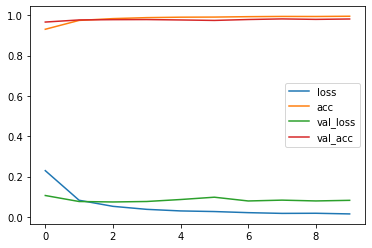

In [26]:
# 学習曲線
import matplotlib.pyplot as plt
for label, metric in history.items():
    plt.plot(metric, label=label)
plt.legend()

### 簡単なCNNの場合
ちょっと精度が上がったが、やはり過学習気味。

In [27]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Linear(7 * 7 * 32, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.fc(x.view(len(x), -1))
        return x
        
history = fit(CNN, epochs=10)

[Epoch 1/10]	time:  29.9s - loss: 0.1560 - acc: 0.9556 - val_loss: 0.0586 - val_acc: 0.9816
[Epoch 2/10]	time:  54.7s - loss: 0.0494 - acc: 0.9844 - val_loss: 0.0429 - val_acc: 0.9865
[Epoch 3/10]	time:  80.6s - loss: 0.0375 - acc: 0.9884 - val_loss: 0.0328 - val_acc: 0.9897
[Epoch 4/10]	time: 106.7s - loss: 0.0303 - acc: 0.9904 - val_loss: 0.0419 - val_acc: 0.9849
[Epoch 5/10]	time: 130.6s - loss: 0.0264 - acc: 0.9918 - val_loss: 0.0374 - val_acc: 0.9878
[Epoch 6/10]	time: 156.5s - loss: 0.0214 - acc: 0.9931 - val_loss: 0.0434 - val_acc: 0.9857
[Epoch 7/10]	time: 178.5s - loss: 0.0187 - acc: 0.9942 - val_loss: 0.0284 - val_acc: 0.9914
[Epoch 8/10]	time: 200.3s - loss: 0.0156 - acc: 0.9952 - val_loss: 0.0265 - val_acc: 0.9915
[Epoch 9/10]	time: 223.2s - loss: 0.0149 - acc: 0.9949 - val_loss: 0.0626 - val_acc: 0.9798
[Epoch 10/10]	time: 248.8s - loss: 0.0127 - acc: 0.9963 - val_loss: 0.0283 - val_acc: 0.9912


### AlexNetの場合
- 入力画像が224x224という前提なので、データを修正しておく（resizeして読み込む）。
- 過学習なく、高精度。
- ちなみにこの実行時間、3080Ti(Laptop)で実行したが、1660Tiでやったときよりちょうど2倍速くなっている。
    - 1660Ti(Laptop): ~600s
    - Tesla T4: 545.2s
    - 1080: ~300s
    - 3080Ti(Laptop): 290.4s
    - 3090: 272.4s

In [ ]:
# データの読み込み
from torchvision import transforms, datasets
trans = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
data_tr = datasets.MNIST("./data/", train= True, transform=trans, download=True)
data_te = datasets.MNIST("./data/", train=False, transform=trans, download=True)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, in_channel=1, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channel, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6)) 
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
        
history = fit(AlexNet, epochs=10)